#### [RQ5] Does a long distance correlate with the duration of the trip on average? Make a plot that show the dependence between distance and duration of the trip. Then compute the Pearson Coefficient, is it significant? Comment the results you obtain.

In [60]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb 
from datetime import datetime
import scipy
from scipy.stats import pearsonr

In [9]:
for month in ['01', '02', '03', '04', '05','06']:
    data_frame = pd.read_csv('yellow_tripdata_2018-'+month+'.csv',usecols=[1,2,4,7])



In [19]:
data_frame.head()
data_frame=data_frame[data_frame.trip_distance !=0]

In [20]:
data_frame.shape

(8653818, 4)

In [22]:
dfl= pd.read_csv("taxi _zone_lookup.csv", usecols=[0,1])
dfl.head()

,LocationID,Borough
0,1,EWR
1,2,Queens
2,3,Bronx
3,4,Manhattan
4,5,Staten Island


In [28]:
dfl= pd.read_csv("taxi _zone_lookup.csv", usecols=[0,1])
df= pd.merge(data_frame, dfl, on= None, left_on = 'PULocationID', right_on = 'LocationID')
df['tpep_pickup_datetime']=pd.to_datetime(df.tpep_pickup_datetime)
df['tpep_dropoff_datetime']=pd.to_datetime(df.tpep_dropoff_datetime)
duration=df['tpep_dropoff_datetime']-df['tpep_pickup_datetime']
df.insert(loc=3,column='Duration',value=duration)
df.head()


,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,Duration,PULocationID,LocationID,Borough
0,2018-06-01 00:04:18,2018-06-01 00:09:18,1.0,00:05:00,230,230,Manhattan
1,2018-06-01 00:24:29,2018-06-01 01:08:43,5.7,00:44:14,230,230,Manhattan
2,2018-06-01 00:03:22,2018-06-01 00:11:18,1.2,00:07:56,230,230,Manhattan
3,2018-06-01 00:48:00,2018-06-01 00:51:21,0.5,00:03:21,230,230,Manhattan
4,2018-06-01 00:57:53,2018-06-01 01:05:33,1.4,00:07:40,230,230,Manhattan


In [56]:
df['Duration']= pd.to_timedelta(df.Duration).dt.total_seconds().astype(int)



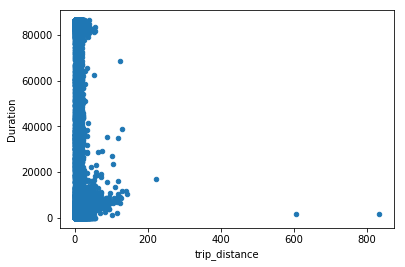

In [57]:
df.plot(x='trip_distance', y='Duration', kind='scatter')

In [59]:
scipy.stats.pearsonr(df['trip_distance'], df['Duration'])

(0.16410016972522246, 0.0)